**Enter your name**

Name:Pakorn
Surname:Sagulkoo
ID:6581030520

**You have to save output parameters and save files to zip file** or **.zip**. if you do not save the output and zip togeter to upload file, then I cannot evaluate the results and can only give at most 5 score for each question. Note that you should name your output file by "yourname_numberofquestion". The high accuracy from test datset student will have some honorable mention.

### 1. Multiple Regression from Simulated Data

Consider Data which is generated by Krittitee Anan(TA). It contains 10 attributes :
1. X1 : continuous data with 0.62 to 0.98
2. X2 : continuous data with 514.50 to 808.50
3. X3 : continuous data with 245.00 to 416.50
4. X4 : continuous data with 110.25 to 220.50
5. X5 : continuous data with 3.50 to 7.00
6. X6 : continuous data with 2.00 to 5.00
7. X7 : continuous data with 0.00 to 0.40
8. X8 : continuous data with 0.00 to 5.00
9. Y1 : continuous data with 6.01 to 43.10



The target is the $9^{th}$ attribute, the response variable Y1.

There is no missing values.

You must implement the multiple regression using **SGD** from our class which evaluate by mean squared errors from test dataset.
- The total 10 points will give to a student who can find the parameters of this regression and achieve 0.3 for the average square loss.
- The total 7 points will give to a student who can find the parameters of this regression and achieve 0.5 for the average square loss.
- The total 5 points will give to a student who can make this code work with this dataset.

This data is contain in zip file. Note that, you have to upload and read data file by using code " io.BytesIO(uploaded["file name"]) " from "io" libaray in read code


In [1]:
# Must run this statement first
!pip install --quiet mxnet
!pip install numpy==1.23.1
#and restart session in Runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


In [24]:
#!pip install --quiet mxnet

In [25]:
# We will need to process this text dataset using pandas
# Deal with data in this block
import mxnet as mx
from mxnet import nd
import pandas as pd
import numpy as np

In [317]:
# Explore the Simdata_Train.csv file
Simdata = pd.read_csv('/content/Quiz3_Simdata_Train.csv')
Simdata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.75,762.75,290.52,198.09,3.69,2.91,0.32,0.92,47.57
1,0.94,758.79,359.81,201.55,4.92,4.93,0.34,4.48,67.80
2,0.87,529.22,312.90,161.09,4.04,3.46,0.35,1.31,43.72
3,0.81,619.33,328.92,155.04,6.59,2.71,0.21,2.04,64.39
4,0.85,558.62,403.50,185.16,6.93,4.34,0.09,0.15,58.43


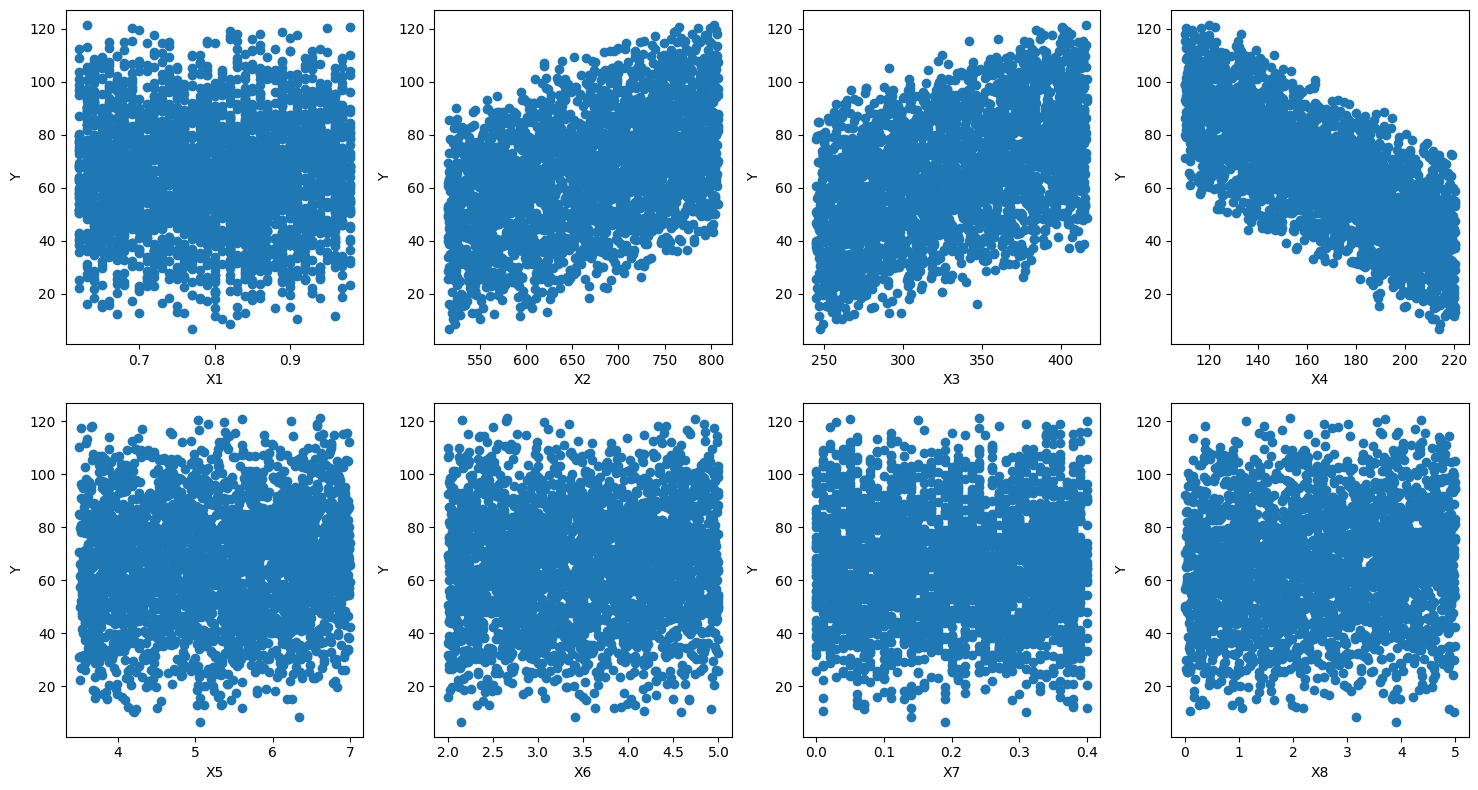

In [307]:
# Look the data plot in each feature
fig, axs = plt.subplots(2, 4, figsize=(15,8))

for i, ax in enumerate(axs.flatten()):
  ax.scatter(Simdata.iloc[:,i], Simdata.Y)
  ax.set_xlabel(Simdata.columns[i])
  ax.set_ylabel('Y')

plt.tight_layout()
plt.show()

In [12]:
# Check the data size
Simdata.shape

(3000, 9)

In [26]:
# Build multiple regression from ground-up
import mxnet as mx
from mxnet import nd, autograd, gluon

In [531]:
# Construct X and y set
X = Simdata.iloc[:,:-1]
y = Simdata.iloc[:,-1]

In [532]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [533]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [534]:
# Contsruct a feature matrix by selecting column x1 to x8 and convert them to nd.array
X_train = nd.array(X_train)
X_train


[[ 1.4716983  -0.09671824 -0.01061756 ...  1.5556122  -1.635702
  -0.50289726]
 [-0.9376304   1.008966   -1.6299715  ... -1.3282932  -0.60001516
   0.9502666 ]
 [ 0.21884735  1.4401875   1.4752355  ...  0.29822946  1.3850515
   1.7220427 ]
 ...
 [ 1.1825788   0.02820849 -1.5920588  ...  1.7517178  -1.7220093
  -1.4345908 ]
 [ 1.278952    0.305338   -1.6422728  ...  0.9557599  -1.635702
  -1.406779  ]
 [-1.5158693  -0.83517927 -0.17275462 ...  0.7365831   0.95351523
  -1.629273  ]]
<NDArray 2400x8 @cpu(0)>

In [535]:
# Contsruct a label vector by selecting column y1 and convert it to nd.array
y_train = y_train.to_numpy()
y_train = nd.array(y_train)
y_train


[68.59 72.78 80.07 ... 51.83 22.23 76.27]
<NDArray 2400 @cpu(0)>

In [536]:
# Construct the test set
X_test = nd.array(X_test)
y_test = y_test.to_numpy()
y_test = nd.array(y_test)

In [537]:
# Import data
from mxnet.gluon import data as gdata

batch_size = 10
# Combine the features and labels of the training data
train_set = gdata.ArrayDataset(X_train, y_train)
# Combine the features and labels of the testing data
test_set = gdata.ArrayDataset(X_test, y_test)
# Randomly reading mini-batches
train_iter = gdata.DataLoader(train_set, batch_size, shuffle=True)
test_iter = gdata.DataLoader(test_set, batch_size=600, shuffle=True)

# Read a batch to see how it works
for X, y in train_iter:
    print(X, y)
    break


[[-0.26301837 -1.0849146  -1.1552567   1.4652007   1.0092931   0.7827256
   1.1261297   0.9850313 ]
 [ 0.02610106 -1.3366573  -0.5379663   0.7732623  -1.3021791  -0.9014752
   0.60828626 -1.2399086 ]
 [ 0.60433996  1.5051305   0.33704945 -0.27652052 -0.7641641   0.4712638
  -0.42740065  0.9850313 ]
 [ 0.5079668   1.0041248   0.6125211   1.6868742   1.5971243   1.1172587
   0.867208   -0.23868564]
 [ 1.3753251  -0.38943407  1.1281734  -0.37532362  0.760212   -1.455185
  -0.85893685  1.7289956 ]
 [ 1.6644446  -0.54931194 -0.5188083  -0.62993157  1.0690725  -0.2208735
   0.34936452 -1.1286616 ]
 [-0.74488413 -0.6268893  -1.4712627   0.8894826   1.2882638  -0.5438709
   1.4713587  -0.12743865]
 [-1.1303767   1.0107371  -1.3446183   0.0825907  -0.36563438 -0.41697907
   0.2630573  -0.92007345]
 [ 0.8934594   1.1988356   1.6458423  -0.93869126 -0.87375975 -1.4667207
  -0.7726296  -1.2190498 ]
 [ 0.5079668  -0.11254071 -1.4720693   1.1057727  -1.4117748   0.14826639
   1.557666   -0.13439159

In [538]:
# Assign an initial model
from mxnet.gluon import nn
net = nn.Sequential()
net.add(nn.Dense(1))

# Assign initial parameters
from mxnet import init
net.initialize(init.Normal(sigma=0.9))

# Assign a loss of function
from mxnet.gluon import loss as gloss
loss = gloss.L2Loss()  # The squared loss is also known as the L2 norm loss
# loss = gloss.HuberLoss(rho=1)

# Assign an algorithm for optimization
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [539]:
# Learning process
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    for X, y in train_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l_train = loss(net(X_train), y_train)
    l_test = loss(net(X_test), y_test)
    print('epoch %d, train loss: %f, test loss: %f' % (epoch, l_train.mean().asnumpy(), l_test.mean().asnumpy()))

epoch 1, train loss: 2.122311, test loss: 2.137710
epoch 2, train loss: 2.163079, test loss: 2.139438
epoch 3, train loss: 2.064098, test loss: 2.028082
epoch 4, train loss: 2.054087, test loss: 2.015337
epoch 5, train loss: 2.132079, test loss: 2.065978
epoch 6, train loss: 2.058100, test loss: 2.058591
epoch 7, train loss: 2.137429, test loss: 2.130907
epoch 8, train loss: 2.050669, test loss: 2.034122
epoch 9, train loss: 2.055182, test loss: 1.999886
epoch 10, train loss: 2.146150, test loss: 2.080208


In [540]:
# Save parameters
net.save_parameters("quiz3_pakorn_1.params")

In [541]:
# Download file
from google.colab import files
files.download('quiz3_pakorn_1.params')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Heart Failure Clinical Records
Consider heart failure clinical records data from UCI repository which is supplied by Davide Chicco and Giuseppe Jurman. It contains 13 attributes :
1. age - age of the patient (years) : interger data with 40 to 95
2. anaemia - decrease of red blood cells or hemoglobin (boolean) : binary data with 0 and 1
3. creatinine_phosphokinase - level of the CPK enzyme in the blood (mcg/L) : integer data with 23.0 to 7861.0
4. diabetes - if the patient has diabetes : binary data with 0 and 1
5. ejection_fraction - percentage of blood leaving the heart at each contraction : integer data with 14.00 to 80.00
6. high_blood_pressure - if the patient has hypertension : binary data with 0 and 1
7. platelets - platelets in the blood (kiloplatelets/mL) : continuous data with 25100 to 850000
8. serum_creatinine - level of serum creatinine in the blood (mg/d) : continuous data with 0.500 to 9.400
9. serum_sodium - level of serum sodium in the blood (mEq/L) : integer data with 113 to 148
10. sex - woman or man  : binary data with 0 and 1
11. smoking - if the patient smokes or no : binary data with 0 and 1
12. time - follow-up period (days) : integer data with 4 to 285
13. death_event - if the patient died during the follow-up period : binary data with 0 and 1.

The target is the $13^{th}$ attribute, death_event.

There is no missing values.

You have to implement the model to predict the results of death_event from the knowledge that learn in our class. The results evaluate from test dataset.
- The total 10 points will give to a student who can create model that achieve more than 60 percent accuracy.
- The total 7 points will give to a student who can create model that achieve more than 40 percent accuracy.
- The total 5 points will give to a student who can make this code work with this dataset.

This data is contain in zip file. Note that, you have to upload and read data file by using code " io.BytesIO(uploaded["file name"]) " from "io" libaray in read code.

In [149]:
heart_df = pd.read_csv('/content/Quiz3_heart_Train.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [649]:
# Construct X and y set
X = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

In [650]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [651]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [652]:
# Contsruct a feature matrix by selecting column x1 to x8 and convert them to nd.array
# X_train = X_train.to_numpy()
X_train = nd.array(X_train)
X_train


[[-0.84120935 -0.8583951   0.83595216 ...  0.73484695 -0.6865403
  -1.1699823 ]
 [-1.7624185  -0.8583951   0.0226813  ...  0.73484695 -0.6865403
   1.5350405 ]
 [ 0.3312387  -0.8583951  -0.450198   ...  0.73484695  1.4565787
   0.9572686 ]
 ...
 [-0.08749276 -0.8583951  -0.472619   ... -1.3608277  -0.6865403
  -0.42150515]
 [-0.08749276 -0.8583951   0.0226813  ...  0.73484695  1.4565787
  -1.14372   ]
 [-1.0087019   1.1649648  -0.50013566 ... -1.3608277  -0.6865403
   0.26131615]]
<NDArray 231x12 @cpu(0)>

In [653]:
# Contsruct a label vector by selecting column y1 and convert it to nd.array
y_train = y_train.to_numpy()
y_train = nd.array(y_train)
y_train


[1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
<NDArray 231 @cpu(0)>

In [654]:
# Construct the test set
# X_test = X_test.to_numpy()
X_test = nd.array(X_test)
y_test = y_test.to_numpy()
y_test = nd.array(y_test)

In [655]:
# Import data
from mxnet.gluon import data as gdata

batch_size = 10
# Combine the features and labels of the training data
train_set = gdata.ArrayDataset(X_train, y_train)
# Combine the features and labels of the testing data
test_set = gdata.ArrayDataset(X_test, y_test)
# Randomly reading mini-batches
train_iter = gdata.DataLoader(train_set, batch_size, shuffle=True)
test_iter = gdata.DataLoader(test_set, batch_size=58, shuffle=True)

# Read a batch to see how it works
for X, y in train_iter:
    print(X, y)
    break


[[-1.5949259   1.1649648  -0.48281035 -0.8583951  -0.22172686 -0.7989355
   1.162379   -0.2985227   0.5714986   0.73484695  1.4565787   0.9703998 ]
 [-0.08749276  1.1649648   0.19797276  1.1649648   0.20438717  1.2516656
   0.75819033 -0.20788294 -2.2888517   0.73484695 -0.6865403  -0.47402987]
 [ 0.3312387   1.1649648  -0.3075189   1.1649648  -1.0739549  -0.7989355
  -0.66193223 -0.02660337 -1.6287708   0.73484695 -0.6865403   1.4168599 ]
 [-1.5949259  -0.8583951   0.0226813  -0.8583951   1.9088433  -0.7989355
   0.05204015 -0.22601089  0.13144466 -1.3608277  -0.6865403  -0.5922105 ]
 [-1.2599407  -0.8583951   0.16230299 -0.8583951   0.20438717  1.2516656
   0.05204015 -0.22601089  0.13144466 -1.3608277  -0.6865403  -0.263931  ]
 [ 1.587433   -0.8583951   0.0226813   1.1649648  -0.22172686 -0.7989355
   0.99851876  0.6078751  -0.52863616  0.73484695 -0.6865403   0.61585796]
 [ 2.759881   -0.8583951   0.0226813   1.1649648   0.03394155  1.2516656
   0.05204015  0.3631477  -0.52863616 

In [666]:
# Assign an initial model
from mxnet.gluon import nn
net = nn.Sequential()
net.add(nn.Dense(8, activation="relu"), nn.Dense(2, activation="relu"))

# Assign initial parameters
from mxnet import init
net.initialize(init.Normal(sigma=0.9))

# Assign a loss of function
from mxnet.gluon import loss as gloss
loss = gloss.SoftmaxCrossEntropyLoss()

# Assign an algorithm for optimization
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [657]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [667]:
# Learning process
num_epochs = 15
for epoch in range(1, num_epochs + 1):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        with autograd.record():
            y_hat = net(X)
            l = loss(y_hat, y).sum()
        l.backward()
        trainer.step(batch_size)
        y = y.astype('float32')
        train_l_sum += l.asscalar()
        train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
        n += y.size
    test_acc = evaluate_accuracy(test_iter, net)
    print('epoch %d, train loss: %f, train acc: %f, test acc: %f' % (epoch, train_l_sum / n, train_acc_sum / n, test_acc))

epoch 1, train loss: 0.903914, train acc: 0.610390, test acc: 0.793103
epoch 2, train loss: 0.636096, train acc: 0.701299, test acc: 0.775862
epoch 3, train loss: 0.564281, train acc: 0.709957, test acc: 0.724138
epoch 4, train loss: 0.504455, train acc: 0.740260, test acc: 0.706897
epoch 5, train loss: 0.462157, train acc: 0.744589, test acc: 0.706897
epoch 6, train loss: 0.427470, train acc: 0.766234, test acc: 0.758621
epoch 7, train loss: 0.405570, train acc: 0.779221, test acc: 0.706897
epoch 8, train loss: 0.379743, train acc: 0.796537, test acc: 0.706897
epoch 9, train loss: 0.371258, train acc: 0.783550, test acc: 0.706897
epoch 10, train loss: 0.344714, train acc: 0.809524, test acc: 0.741379
epoch 11, train loss: 0.336834, train acc: 0.809524, test acc: 0.724138
epoch 12, train loss: 0.316620, train acc: 0.826840, test acc: 0.758621
epoch 13, train loss: 0.311384, train acc: 0.805195, test acc: 0.724138
epoch 14, train loss: 0.296783, train acc: 0.826840, test acc: 0.724138
e

In [668]:
# Save parameters
net.save_parameters("quiz3_pakorn_2.params")

In [669]:
# Download file
from google.colab import files
files.download('quiz3_pakorn_2.params')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3. Wines
Consider the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars data from UCI repository which is supplied by Stefan Aeberhard and M. Forina. It contains 14 attributes:
1. class - type of wines : interger data with 1 to 3
2. Alcohol: continuous data with 11.03 and 14.83
3. Malicacid: continuous data with 0.740 to 5.800
4. Ash: continuous data with 1.360 and 3.230
5. Alcalinity_of_ash: continuous data with 10.60 to 30.00
6. Magnesium: continuous data with 70.00 and 162.00
7. Total_phenols: continuous data with 0.980 to 3.880
8. Flavanoids: continuous data with 0.340 to 5.080
9. Nonflavanoid_phenols: continuous data with 0.1300 to 0.6600
10. Proanthocyanins: continuous data with 0.410 and 3.580
11. Color_intensity: continuous data with 1.280 and 13.000
12. Hue: continuous data with 0.4800 to 1.7100
13. 0D280_0D315_of_diluted_wines : continuous data with 1.270 and 4.000
14. Proline: integer data with 278 to 1680.

The target is the $1^{st}$ attribute, class.

There is no missing values.

You have to implement the model to predict the results of class of wines from the knowledge that learn in our class. The results evaluate from test dataset.
- The total 10 points will give to a student who can create model that achieve more than 60 percent accuracy.
- The total 7 points will give to a student who can create model that achieve more than 40 percent accuracy.
- The total 5 points will give to a student who can make this code work with this dataset.

This data is contain in zip file. Note that, you have to upload and read data file by using code " io.BytesIO(uploaded["file name"]) " from "io" libaray in read code.

In [798]:
wine_df = pd.read_csv('/content/Quiz3_wine_Train.csv')
wine_df.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [799]:
# Explore the number of the label type
wine_df.loc[:,'class'].unique()

array([1, 2, 3])

In [800]:
# Construct X and y set
X = wine_df.iloc[:,1:]
y = wine_df.iloc[:,0]

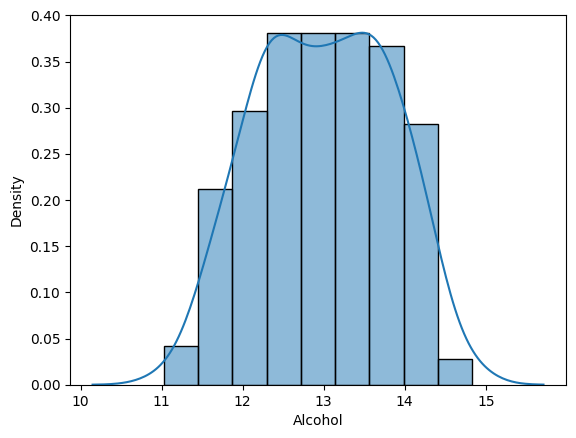

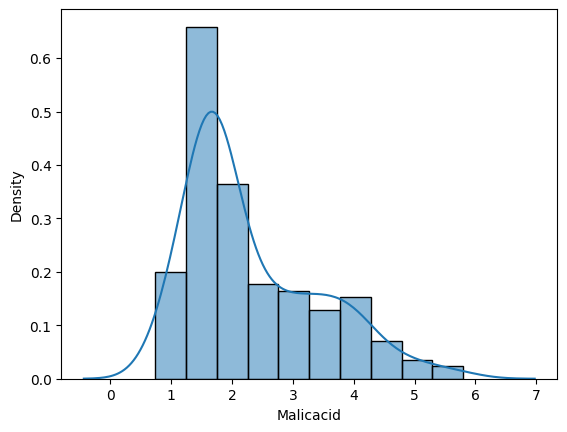

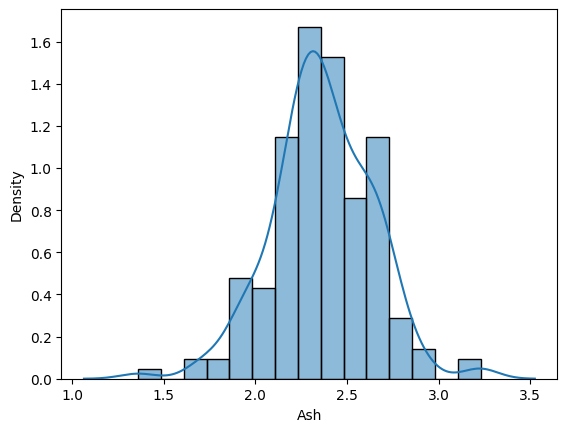

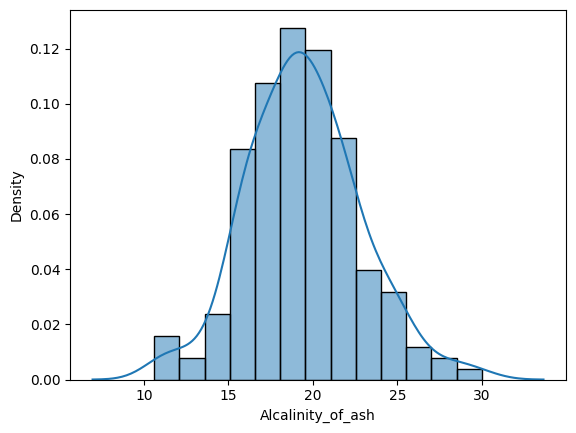

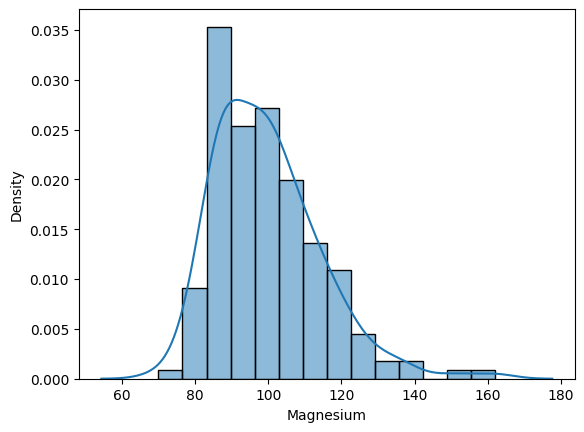

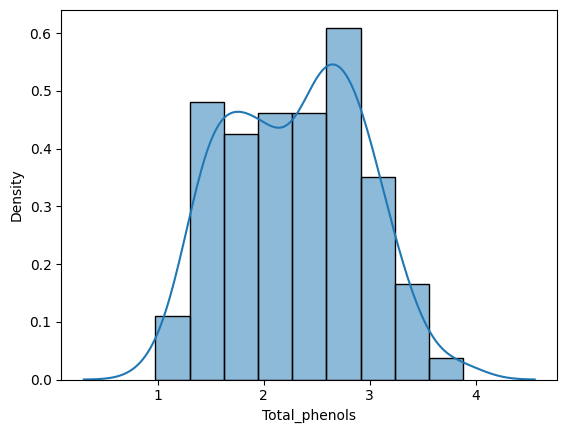

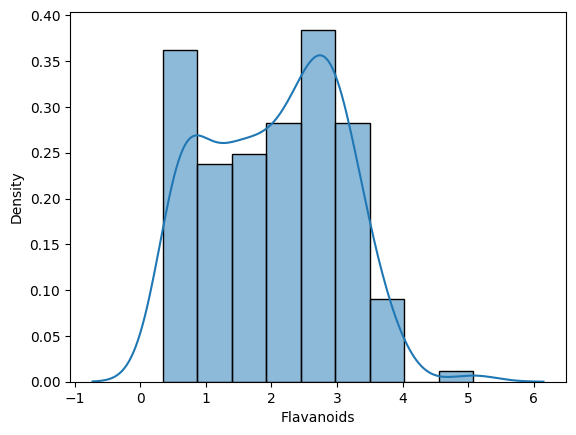

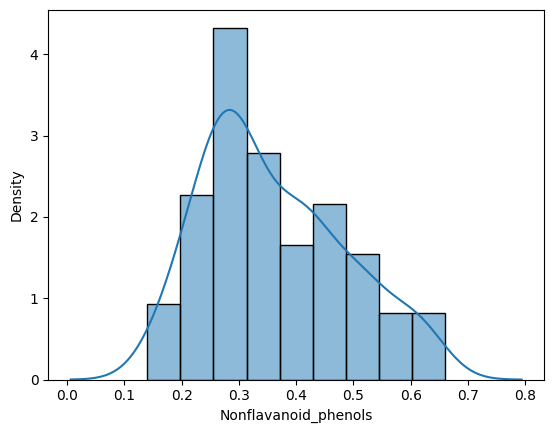

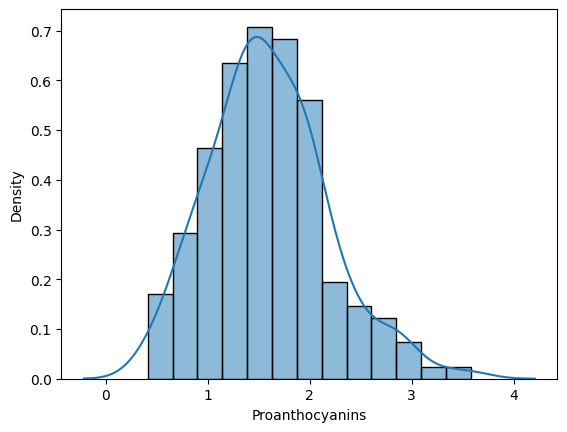

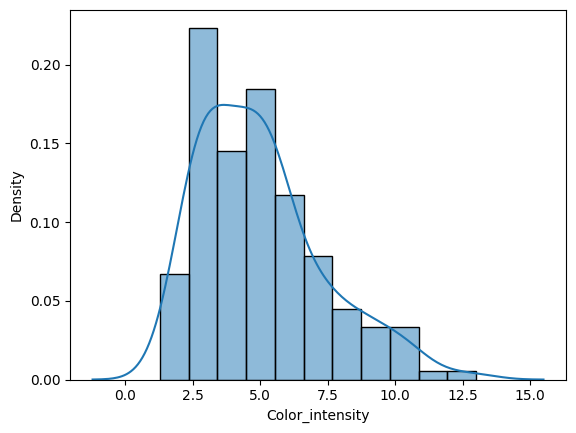

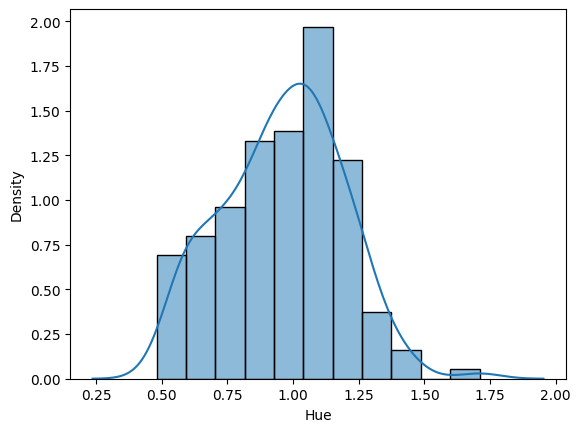

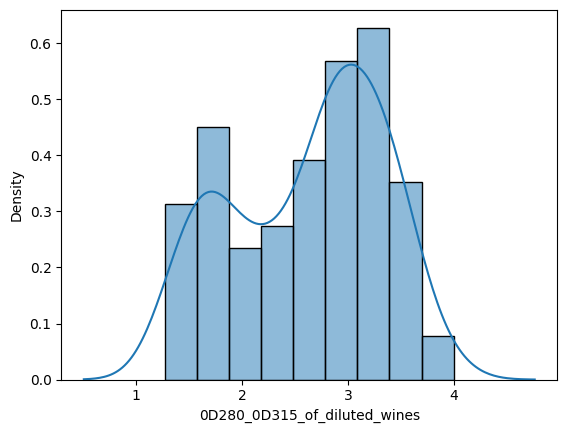

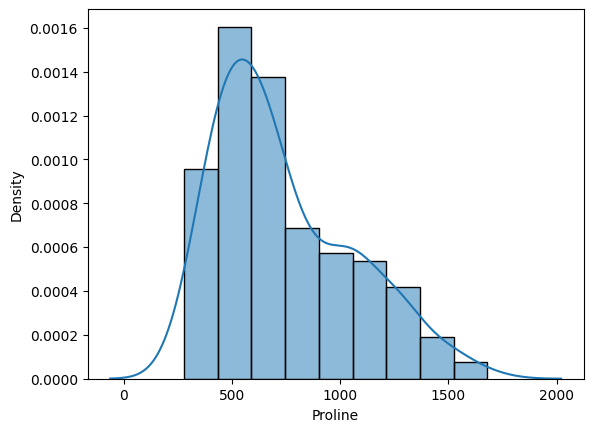

In [750]:
# Explore features' distribution
import seaborn as sns
for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.histplot(X[col], stat='density', kde=True, kde_kws={"cut": 3})

In [753]:
# Take logarithmic transformation to Malicacid, Magnesium, Nonflavonoid_phenols, Color_intensity, Hue, Proline
# columns_for_log = ['Malicacid', 'Magnesium', 'Nonflavanoid_phenols', 'Color_intensity', 'Hue', 'Proline']
# for column in columns_for_log:
#   X[column] = np.log(X[column])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [801]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [802]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [803]:
# Contsruct a feature matrix by selecting column x1 to x8 and convert them to nd.array
# X_train = X_train.to_numpy()
X_train = nd.array(X_train)
X_train


[[-1.0351068  -0.7985017   0.5995348  ...  2.075387   -0.560696
  -1.2146211 ]
 [ 1.5122176   1.5015066   0.2632376  ... -0.42949045  0.9305814
   1.095625  ]
 [ 0.06373902 -0.26568124  3.1778133  ...  0.69338566  0.7543395
   0.2989884 ]
 ...
 [-0.88526416 -0.65641624 -0.59618855 ... -0.2740153  -1.1165358
   0.42645025]
 [-0.72293466  1.8478398   1.3468618  ... -0.21355273  0.64588296
  -1.1827556 ]
 [ 1.3748618  -0.29232225  0.11377218 ...  0.43426043  0.14427148
   1.0318941 ]]
<NDArray 134x13 @cpu(0)>

In [804]:
# Contsruct a label vector by selecting column y1 and convert it to nd.array
y_train = y_train.to_numpy()
y_train = nd.array(y_train)
y_train


[2. 1. 1. 2. 2. 1. 3. 3. 3. 1. 2. 3. 1. 3. 1. 2. 2. 2. 2. 2. 1. 2. 3. 2.
 2. 2. 1. 2. 3. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 3. 3. 2. 3. 3. 3. 1. 2. 3.
 2. 2. 2. 2. 1. 1. 2. 1. 3. 1. 3. 1. 1. 2. 1. 2. 1. 3. 3. 1. 2. 2. 2. 3.
 1. 3. 3. 1. 1. 2. 3. 1. 1. 2. 1. 2. 1. 3. 2. 1. 2. 3. 3. 1. 2. 1. 3. 1.
 1. 1. 3. 3. 1. 1. 2. 1. 3. 3. 3. 1. 3. 1. 2. 2. 2. 2. 3. 2. 2. 1. 2. 3.
 3. 1. 2. 3. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1.]
<NDArray 134 @cpu(0)>

In [805]:
# Construct the test set
# X_test = X_test.to_numpy()
X_test = nd.array(X_test)
y_test = y_test.to_numpy()
y_test = nd.array(y_test)

In [806]:
# Import data
from mxnet.gluon import data as gdata

batch_size = 10
# Combine the features and labels of the training data
train_set = gdata.ArrayDataset(X_train, y_train)
# Combine the features and labels of the testing data
test_set = gdata.ArrayDataset(X_test, y_test)
# Randomly reading mini-batches
train_iter = gdata.DataLoader(train_set, batch_size, shuffle=True)
test_iter = gdata.DataLoader(test_set, batch_size=34, shuffle=True)

# Read a batch to see how it works
for X, y in train_iter:
    print(X, y)
    break


[[ 0.72554386  0.20497681  1.1973965   1.525084    0.3588414  -1.2207559
  -1.2198658   0.27559316 -0.11595532  1.689386   -0.99092853 -1.1436499
   0.0440647 ]
 [-0.08610359  0.40922466  1.2347628   0.4657469  -0.2558784  -1.2370586
  -1.5599948   1.4245104  -1.4458611  -0.17452307 -0.8613659  -0.45223948
  -0.43391725]
 [-0.26091996  0.2848999   0.41270304  0.7684147   0.8369568  -1.3348749
  -0.6996684  -0.9553896  -0.5873143   2.6718407  -2.1138046  -1.5910331
  -0.8163028 ]
 [ 0.4008849   0.7910793   0.03903947  0.6170808  -0.5290872  -0.60125333
  -1.2998961   0.7679863  -0.60414857  1.5792042  -1.8114918  -1.3876772
  -0.27458993]
 [-0.01118228 -0.60313416  0.8610993   3.1897566   2.681116    1.6322167
   0.83091223 -1.2015861   0.59108317 -0.7483867   1.4707614   1.1610515
   0.79290307]
 [ 0.3009898   0.21385716  1.8699908   0.4657469   1.24677     0.81708163
   0.6308363   0.27559316  0.3554037  -0.30306852  0.30469778  0.3882987
  -0.00373349]
 [-1.6719378  -0.41664702 -1.6

In [862]:
# Assign an initial model
from mxnet.gluon import nn
net = nn.Sequential()
net.add(nn.Dense(16, activation="relu"), nn.Dense(16, activation="relu"), nn.Dense(3, activation="relu"))
# net.add(nn.Dense(3, activation="relu"))

# Assign initial parameters
from mxnet import init
net.initialize(init.Normal(sigma=0.9))

# Assign a loss of function
from mxnet.gluon import loss as gloss
loss = gloss.SoftmaxCrossEntropyLoss()

# Assign an algorithm for optimization
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [808]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1)+1 == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [863]:
# Learning process
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        with autograd.record():
            y_hat = net(X)
            l = loss(y_hat, y).sum()
        l.backward()
        trainer.step(batch_size)
        y = y.astype('float32')
        train_l_sum += l.asscalar()
        train_acc_sum += (y_hat.argmax(axis=1)+1 == y).sum().asscalar()
        n += y.size
    test_acc = evaluate_accuracy(test_iter, net)
    print('epoch %d, train loss: %f, train acc: %f, test acc: %f' % (epoch, train_l_sum / n, train_acc_sum / n, test_acc))

epoch 1, train loss: 1.901345, train acc: 0.380597, test acc: 0.529412
epoch 2, train loss: 0.841032, train acc: 0.574627, test acc: 0.529412
epoch 3, train loss: 0.816556, train acc: 0.582090, test acc: 0.558824
epoch 4, train loss: 0.798441, train acc: 0.589552, test acc: 0.558824
epoch 5, train loss: 0.794747, train acc: 0.574627, test acc: 0.558824
epoch 6, train loss: 0.794994, train acc: 0.589552, test acc: 0.558824
epoch 7, train loss: 0.822115, train acc: 0.582090, test acc: 0.558824
epoch 8, train loss: 0.789483, train acc: 0.589552, test acc: 0.558824
epoch 9, train loss: 0.788078, train acc: 0.589552, test acc: 0.558824
epoch 10, train loss: 0.787690, train acc: 0.589552, test acc: 0.558824


In [864]:
# Save parameters
net.save_parameters("quiz3_pakorn_3.params")

In [865]:
# Download file
from google.colab import files
files.download('quiz3_pakorn_3.params')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>